In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

df = pd.read_csv('titanic.csv')

#1Добавление нового атрибута к текущему датасету. Новый атрибут - категория возраста
df['AgeCategory'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, np.inf], labels=['0-18', '19-35', '36-50', '51+'])
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked AgeCategory  
0      0         A/5 21171   7.2500   NaN        S       19-35  
1      0          PC 17599  71.2833   C85        C       36-50  
2      0  STON/O2. 3101282   7.9250   NaN        S       19-35  
3      0            113803  53.1000  C123        S       19-

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

df = pd.read_csv('titanic.csv')

#2 "Причёсывание" датасета
missing_counts = df.select_dtypes(include=[np.number]).isna().sum()
print("Пропущенные значения по числовым столбцам:")
print(missing_counts)
print('\n')
df[df.select_dtypes(include=[np.number]).columns] = df.select_dtypes(include=[np.number]).apply(pd.to_numeric, errors='coerce')
df.infer_objects()
df.interpolate(method='linear', inplace=True)

missing_counts_after = df.select_dtypes(include=[np.number]).isna().sum()
print("Пропущенные значения после обработки:")
print(missing_counts_after)
print("\n")
clear = df.dropna()
num_rows = clear.shape[0]
print(f"Количество строк в датасете без пропусков: {num_rows}")

# Удаление дубликатов
df = df.drop_duplicates()

# Удаление выбросов(значения выбросов из предыдущей лабораторной работы
df = df.drop(df[(df['Fare'] >= 300)].index)
df = df.drop(df[(df['SibSp'] >= 5)].index)

Пропущенные значения по числовым столбцам:
PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64


Пропущенные значения после обработки:
PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


Количество строк в датасете без пропусков: 202


C:\Users\Софья\AppData\Local\Temp\ipykernel_2884\4268677511.py:17: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


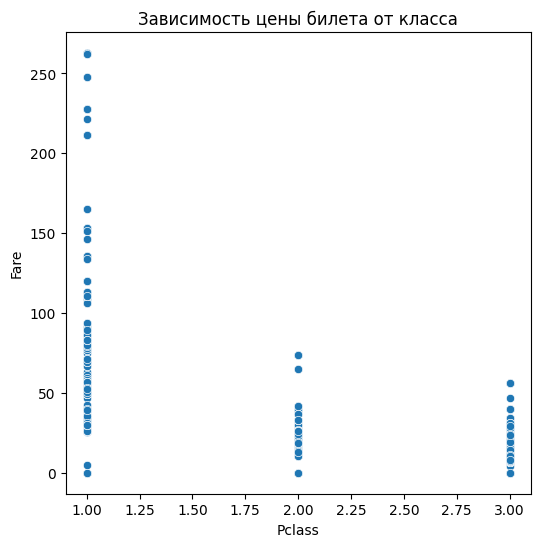

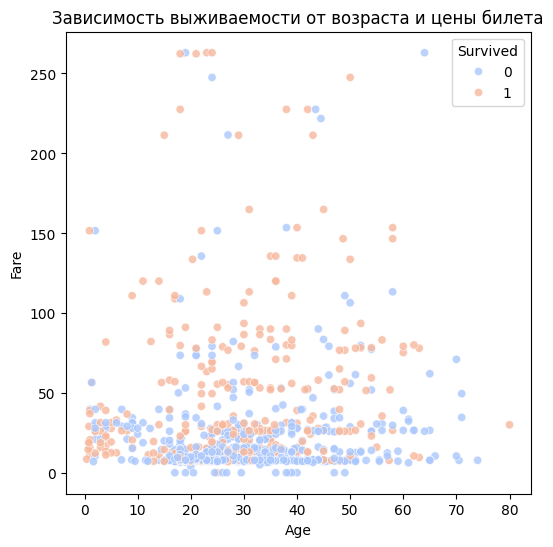

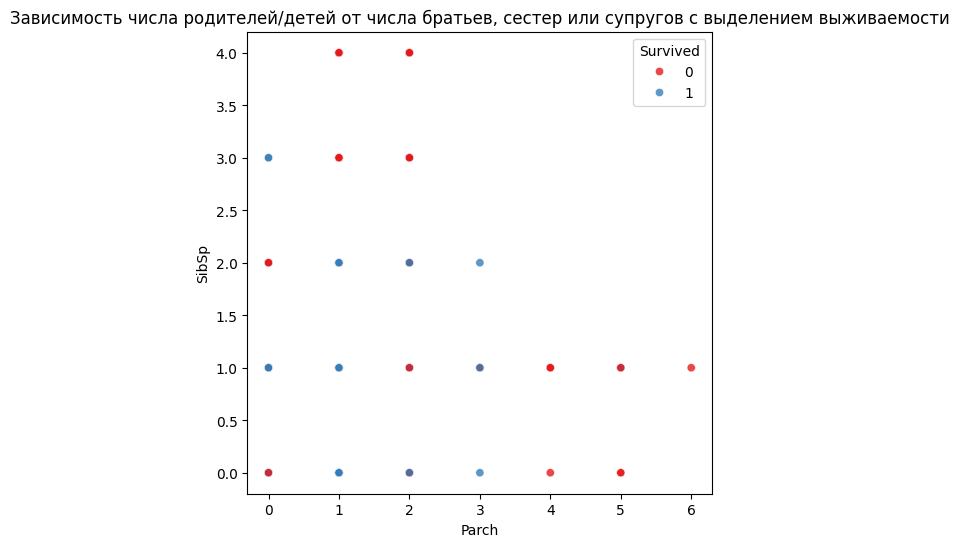

In [3]:
#3 Графики зависимости одной переменной от другой
# График зависимости цены билета от класса
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Pclass', y='Fare', data=df)
plt.title('Зависимость цены билета от класса')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# График выживаемости от возраста и цены билета
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='coolwarm', alpha=0.8)
plt.title('Зависимость выживаемости от возраста и цены билета')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# График зависимости числа родителей/детей от числа братьев, сестер или супругов с выделением выживаемости
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Parch', y='SibSp', hue='Survived', data=df, palette='Set1', alpha=0.8)
plt.title('Зависимость числа родителей/детей от числа братьев, сестер или супругов с выделением выживаемости')
plt.xlabel('Parch')
plt.ylabel('SibSp')
plt.show()

Text(0, 0.5, 'Инерция')

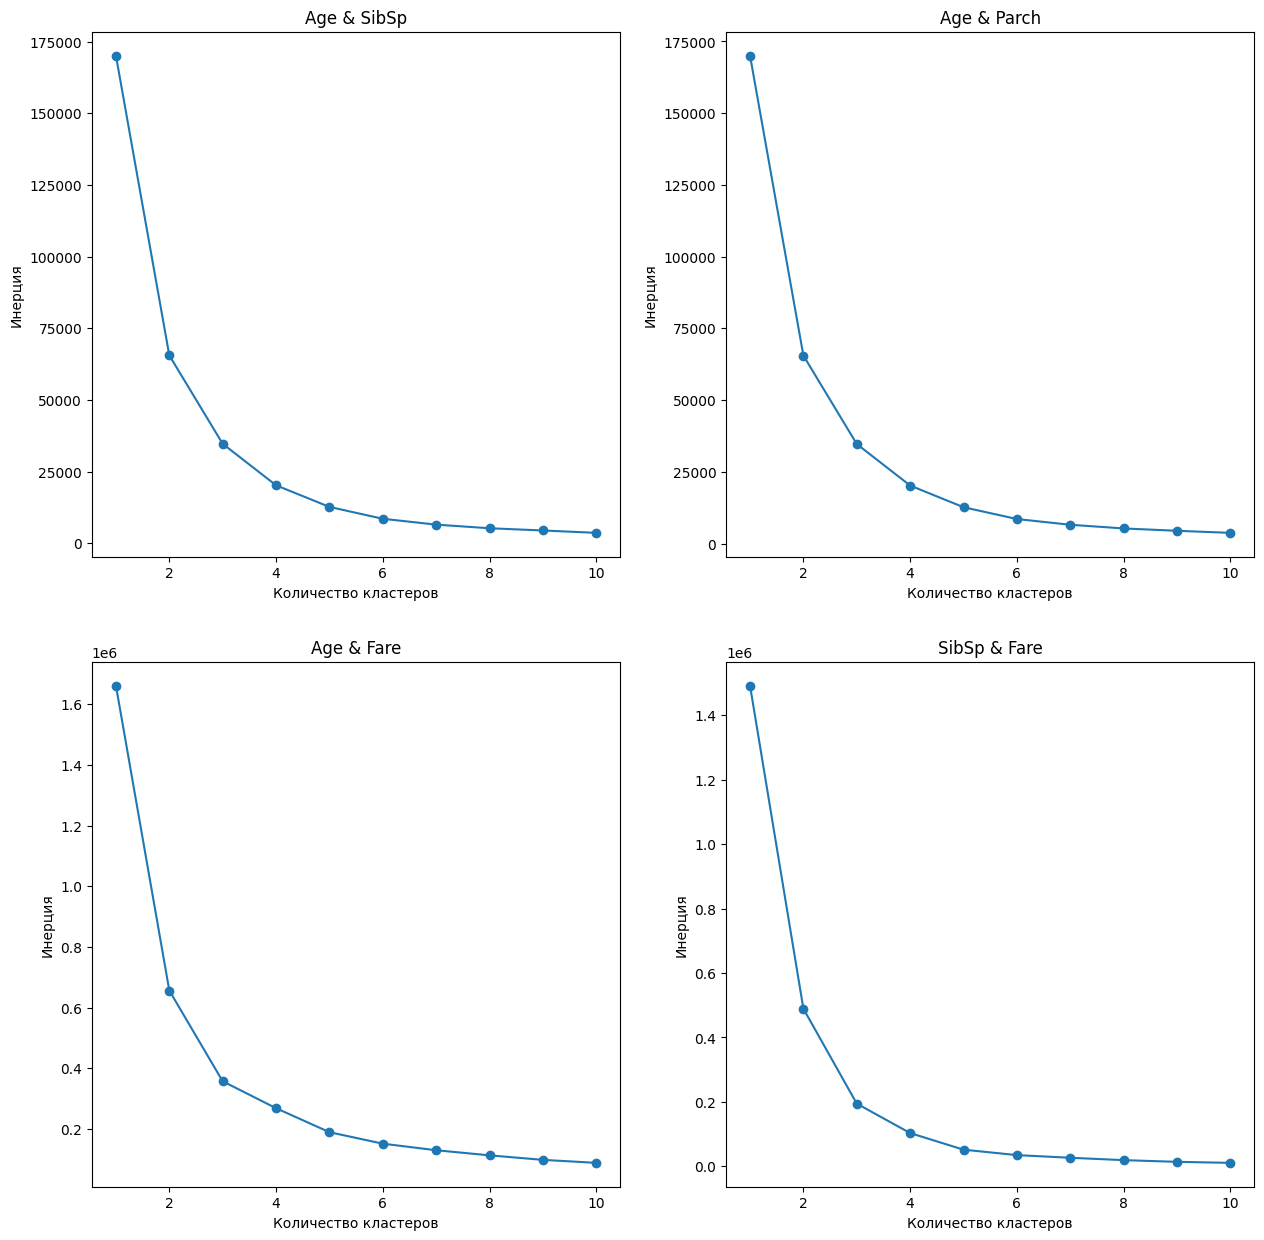

In [5]:
# Чтобы узнать количества числа кластеров используем метод локтя
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# Вычисление инерции для разного числа кластеров
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(df[['Age', 'SibSp']])
    inertia.append(kmeans.inertia_)

# Построение графика "локтя"
axes[0,0].plot(range(1, 11), inertia, marker='o')
axes[0,0].set_title('Age & SibSp')
axes[0,0].set_xlabel('Количество кластеров')
axes[0,0].set_ylabel('Инерция')

#
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(df[['Age', 'Parch']])
    inertia.append(kmeans.inertia_)
axes[0,1].plot(range(1, 11), inertia, marker='o')
axes[0,1].set_title('Age & Parch')
axes[0,1].set_xlabel('Количество кластеров')
axes[0,1].set_ylabel('Инерция')

#
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(df[['Age', 'Fare']])
    inertia.append(kmeans.inertia_)
axes[1,0].plot(range(1, 11), inertia, marker='o')
axes[1,0].set_title('Age & Fare')
axes[1,0].set_xlabel('Количество кластеров')
axes[1,0].set_ylabel('Инерция')

#
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(df[['SibSp', 'Fare']])
    inertia.append(kmeans.inertia_)
axes[1,1].plot(range(1, 11), inertia, marker='o')
axes[1,1].set_title('SibSp & Fare')
axes[1,1].set_xlabel('Количество кластеров')
axes[1,1].set_ylabel('Инерция')

#По построенным графикам, оптимальное количество кластеров для каждого рассматриваемого случая - 3

C:\Users\Софья\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


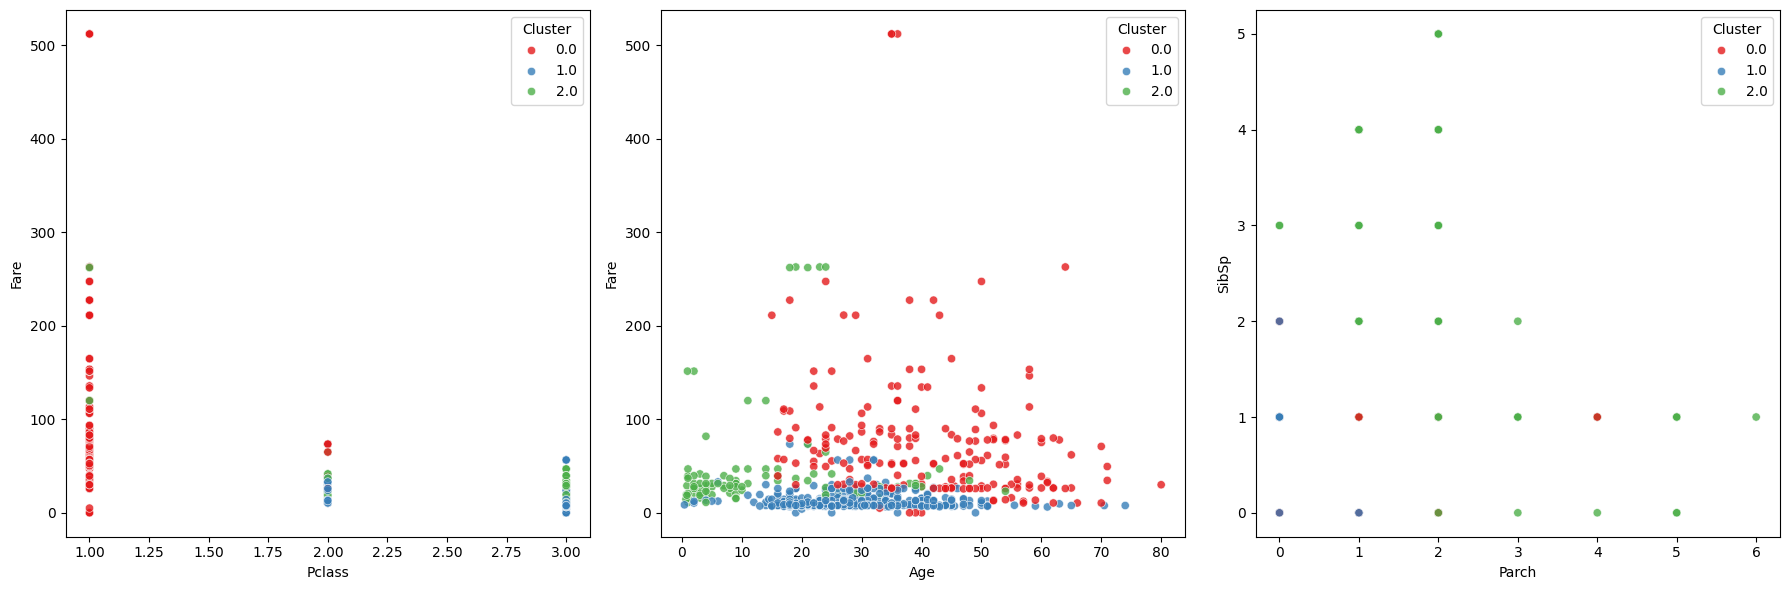

'\nВыводы:\n    В ходе выполнения задания мы провели комплексный анализ данных, включающий несколько этапов. Добавление нового атрибута,\nтакого как \'категория возраста\', позволило более полно охарактеризовать наши данные. \n    "Причесывание" датасета, включая удаление дубликатов,\nобработку пропущенных значений и устранение выбросов, сделало данные более надежными и готовыми к дальнейшему анализу.\n    Построение графиков зависимости переменных выявило визуальные паттерны и помогло выделить кластеры данных. Это позволило нам выявить\nструктуру и особенности внутри датасета. \n    Применение метода KMeans, с определением оптимального количества кластеров, уточнило наше понимание группировки данных, выделив ключевые\nхарактеристики внутри каждого кластера.\n'

In [6]:
#4 Применение метода KMeans
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic.csv')

features = ['Pclass', 'Age', 'Fare', 'Parch', 'SibSp']
X = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Определение количества кластеров
kmeans = KMeans(n_clusters=3, random_state=42)
df_clusters = pd.DataFrame(kmeans.fit_predict(X_scaled), columns=['Cluster'], index=X.index)
df = pd.concat([df, df_clusters], axis=1)
plt.figure(figsize=(18, 6))

# График 1: Зависимость цены билета от класса
plt.subplot(131)
sns.scatterplot(x='Pclass', y='Fare', data=df, hue='Cluster', palette='Set1', alpha=0.8)
plt.xlabel('Pclass')
plt.ylabel('Fare')

# График 2: Зависимость кластеров от возраста и цены билета
plt.subplot(132)
sns.scatterplot(x='Age', y='Fare', hue='Cluster', data=df, palette='Set1', alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Fare')

# График 3: Зависимость кластеров от числа родителей/детей и братьев, сестер или супругов
plt.subplot(133)
sns.scatterplot(x='Parch', y='SibSp', hue='Cluster', data=df, palette='Set1', alpha=0.8)
plt.xlabel('Parch')
plt.ylabel('SibSp')

plt.tight_layout()
plt.show()

"""
Выводы:
    В ходе выполнения задания мы провели комплексный анализ данных, включающий несколько этапов. Добавление нового атрибута,
такого как 'категория возраста', позволило более полно охарактеризовать наши данные. 
    "Причесывание" датасета, включая удаление дубликатов,
обработку пропущенных значений и устранение выбросов, сделало данные более надежными и готовыми к дальнейшему анализу.
    Построение графиков зависимости переменных выявило визуальные паттерны и помогло выделить кластеры данных. Это позволило нам выявить
структуру и особенности внутри датасета. 
    Применение метода KMeans, с определением оптимального количества кластеров, уточнило наше понимание группировки данных, выделив ключевые
характеристики внутри каждого кластера.
"""